In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


# Загрузка данных по двухвальной схеме на 16 МВт

In [2]:
data_2_free = pd.read_json('/tmp/dat').sort_values('t')

g - расход, кг/c; 
g_norm - относительный приведенный расход в турбине компрессоре;
g_norm_c - относительный приведенный расход в компрессоре;
g_norm_tf - относительный приведенный расход в свободной турбине;
p - мощность в МВт; 
pi_c - степень повышения давления в компрессоре; 
pi_f - степень понижения давления в свободной турбине; 
pi_tc - степень понижения давления в турбине компрессора; 
t - температура в камере сгорания 

In [3]:
data_2_free

,g,g_norm,g_norm_c,g_norm_tf,p,pi_c,pi_f,pi_tc,rpm_ft,rpm_tc,t
16,49.793969,0.999739,0.765376,0.985802,8.898238,7.041515,2.241385,2.689990,2302.489495,9299.077127,1240
15,50.475986,0.999758,0.775860,0.987598,9.330382,7.167946,2.277292,2.695114,2339.327492,9343.839342,1250
14,51.146510,0.999774,0.786166,0.989236,9.768209,7.293471,2.313189,2.699754,2375.516124,9387.361158,1260
13,51.805728,0.999789,0.796299,0.990722,10.211322,7.418095,2.349078,2.703934,2411.065318,9429.691691,1270
12,52.454275,0.999801,0.806268,0.992065,10.659512,7.541883,2.384974,2.707679,2445.998915,9470.905449,1280
11,53.091704,0.999811,0.816065,0.993272,11.112057,7.664749,2.420851,2.711009,2480.300563,9511.004902,1290
10,53.718570,0.999820,0.825701,0.994349,11.568706,7.786746,2.456720,2.713947,2513.990061,9550.054005,1300
9,54.335256,0.999828,0.835180,0.995304,12.029143,7.907913,2.492588,2.716517,2547.081487,9588.103005,1310
8,54.946974,0.999834,0.844583,0.996152,12.496407,8.029309,2.528761,2.718764,2579.852599,9625.491997,1320
7,55.544025,0.999840,0.853760,0.996885,12.963315,8.148873,2.564627,2.720662,2611.770191,9661.652185,1330


#### Максимальные значения различных параметров 

In [4]:
data_2_free.max()

g              59.485198
g_norm          0.999856
g_norm_c        0.914339
g_norm_tf       0.999637
p              16.289274
pi_c            8.966783
pi_f            2.815794
pi_tc           2.726697
rpm_ft       2819.739354
rpm_tc       9892.365256
t            1400.000000
dtype: float64

#### Построим графики параметров установки от мощности установки (все величины и мощность установки отнесены к максимальным значениям соответствующих параметров)

In [5]:
data_2_free_norm = data_2_free / data_2_free.max()

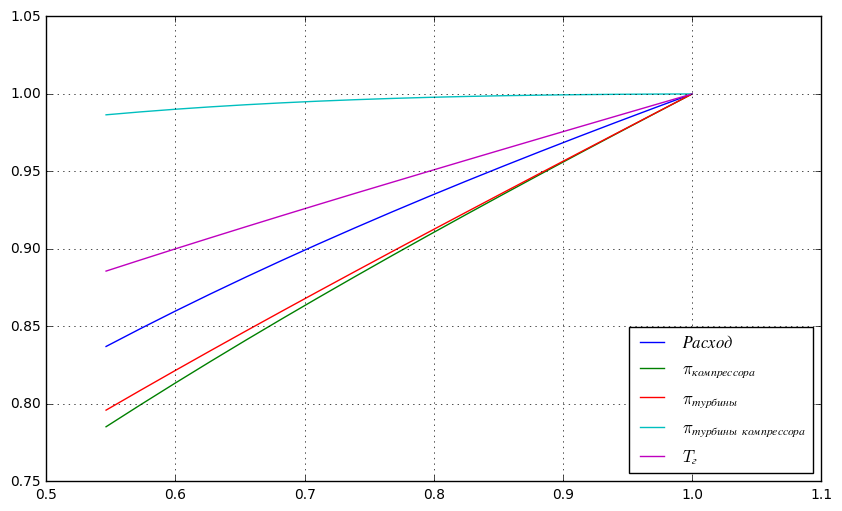

In [6]:
plt.plot(
    data_2_free_norm.p, data_2_free_norm.g,
    data_2_free_norm.p, data_2_free_norm.pi_c,
    data_2_free_norm.p, data_2_free_norm.pi_f,
    data_2_free_norm.p, data_2_free_norm.pi_tc,
    data_2_free_norm.p, data_2_free_norm.t
)
plt.grid()
plt.legend(['$Расход$', '$\pi_{компрессора}$', '$\pi_{турбины}$', '$\pi_{турбины \/\ компрессора}$', '$T_г$'], loc='best')
plt.show()